In [58]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 

In [59]:
df = pd.read_csv('titanic.csv')

In [60]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

# Part A â€“ Data Exploration (Pandas & Numpy)
## 1 - Load the dataset
    - Use Pandas to load the CSV.
    - Display the first 10 rows to get a quick look.
    - Print the column names and their data types.
    - Use .describe() to view basic statistics (mean, min, max, etc.).


In [61]:
# Display the first 10 rows to get a quick look.
df.head(10)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
5      0            330877   8.4583   NaN        Q  
6      0             17463  51.8625   E46        S  
7      1            349909  21.0750   NaN        S  
8      2            347742  11.1333   NaN        S  
9      0            237736  30.0708   NaN        C

In [62]:
#Print the column names and their data types.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [63]:
#Use .describe() to view basic statistics (mean, min, max, etc.).
df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

##  2-Handle Missing Values
     -Check for missing values with .isnull().sum().
     -Replace missing Age values with the mean age (using Numpy).
     - Fill missing Embarked values with the most common port.

In [64]:
#Check for missing values with .isnull().sum().
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [65]:
#Replace missing Age values with the mean age (using Numpy).
mean_age = df['Age'].mean()
df.loc[df['Age'].isnull(),'Age']=mean_age

In [66]:
##Fill missing Embarked values with the most common por
most_common_port = "S"
df.loc[df['Embarked'].isnull(),'Embarked']=most_common_port
df.drop(columns=['Cabin'], inplace=True)

print("\nMissing values after cleaning:")
print(df.isnull().sum())



Missing values after cleaning:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


## 3-Basic Questions
    - How many passengers were onboard?
    - What is the average Age?
    - What is the average Fare?
    - How many males and females were there?


In [67]:
#How many passengers were onboard?
num_passengers = len(df)
print(f"\nTotal number of passengers onboard: {num_passengers}")


Total number of passengers onboard: 891


In [68]:
# What is the average Age?
avg_age = df['Age'].mean()
print(f"Average Age of passengers: {avg_age:.2f} years")

Average Age of passengers: 29.70 years


In [69]:
# What is the average Fare?
avg_fare = df['Fare'].mean()
print(f"Average Fare paid: ${avg_fare:.2f}")

Average Fare paid: $32.20


In [70]:
#How many males and females were there?
gender_counts = df['Sex'].value_counts()
print("\nGender distribution:")
print(gender_counts)


Gender distribution:
Sex
male      577
female    314
Name: count, dtype: int64


# Part B â€“ Data Analysis (Pandas)

## 4- Survival Analysis
   - How many survived vs. did not survive?
   - What percentage of passengers survived?


In [71]:
# How many survived vs. did not survive?
survival_counts = df['Survived'].value_counts()
print("\nSurvival Count (0 = No, 1 = Yes):")
print(survival_counts)


Survival Count (0 = No, 1 = Yes):
Survived
0    549
1    342
Name: count, dtype: int64


In [72]:
# What percentage of passengers survived?
survival_percentage = df['Survived'].value_counts(normalize=True) * 100
print("\nSurvival Percentage:")
print(f"{survival_percentage[1]:.2f}% survived.")


Survival Percentage:
38.38% survived.


## 5-Survival by Class (Pclass)
   - Find survival rates for 1st, 2nd, and 3rd class.
   - Which class had the highest chance of survival?


In [73]:
survival_by_class = df.groupby('Pclass')['Survived'].mean() * 100
print("\nSurvival Rate by Ticket Class (%):")
print(survival_by_class)
print(f"The class with the highest chance of survival was Class {survival_by_class.idxmax()}.") 



Survival Rate by Ticket Class (%):
Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64
The class with the highest chance of survival was Class 1.


## 6-Survival by Age Group
    - Divide passengers into age groups:
    - 0â€“12 = Child
    - 13â€“19 = Teen
    - 20â€“40 = Adult
    - 41+ = Senior
    - Calculate survival rate for each group.




In [74]:
bins = [0, 12, 19, 40, df['Age'].max()]
labels = ['Child', 'Teen', 'Adult', 'Senior']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

In [75]:
survival_by_age_group = df.groupby('AgeGroup')['Survived'].mean() * 100
print("\nSurvival Rate by Age Group (%):")
print(survival_by_age_group)



Survival Rate by Age Group (%):
AgeGroup
Child     57.352941
Teen      43.661972
Adult     35.823430
Senior    37.037037
Name: Survived, dtype: float64


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11836\1186415363.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_age_group = df.groupby('AgeGroup')['Survived'].mean() * 100


# Part C â€“ Visualization (Matplotlib & Seaborn)


## 7-Matplotlib
    - Bar chart: Number of survivors (0 vs 1).
    - Histogram: Distribution of passenger ages (bins = 20).
    - Pie chart: Gender distribution.


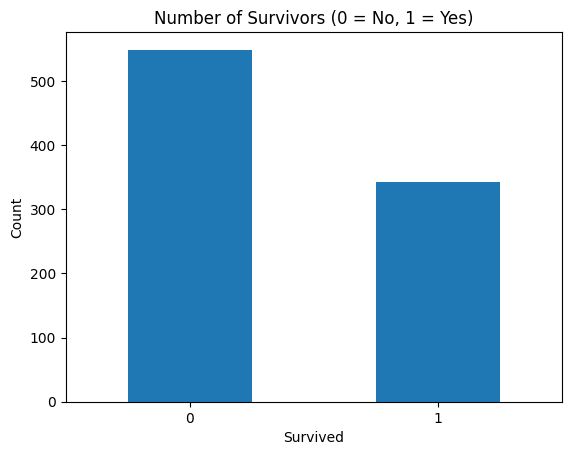

In [76]:
# Bar chart: Number of survivors (0 vs 1).
plt.figure()
survival_counts.plot(kind='bar', rot=0)
plt.title('Number of Survivors (0 = No, 1 = Yes)')
plt.xlabel('Survived')
plt.ylabel('Count')
#plt.savefig('survival_bar_chart.png')
plt.show()

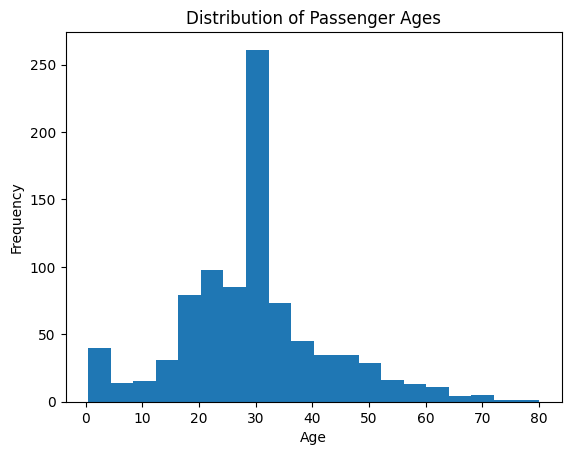

In [77]:
# Histogram: Distribution of passenger ages (bins = 20).
plt.figure()
df['Age'].plot(kind='hist', bins=20)
plt.title('Distribution of Passenger Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
#plt.savefig('age_histogram.png')
plt.show()

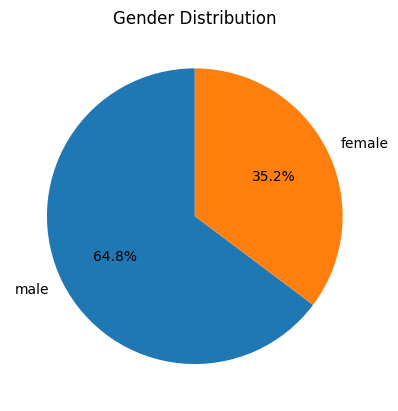

In [78]:
# Pie chart: Gender distribution.
plt.figure()
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()

## 8-Seaborn
    - Countplot: Survived by Sex (Who survived more?).
    - Boxplot: Fare by Pclass (Which class paid more?).
    - Violinplot: Age by Survived (Age distribution among survivors).
    - Heatmap: Correlation between numerical columns (Age, Fare, Pclass, Survived).


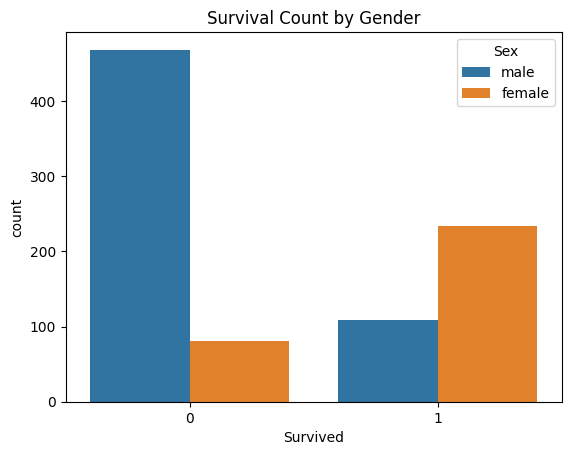

In [79]:
#Countplot: Survived by Sex (Who survived more?).
plt.figure()
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival Count by Gender')
plt.show()

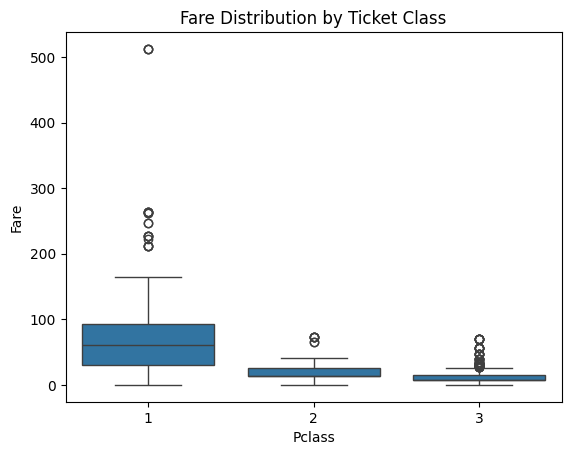

In [80]:
#Boxplot: Fare by Pclass (Which class paid more?).
plt.figure()
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Fare Distribution by Ticket Class')
plt.show()

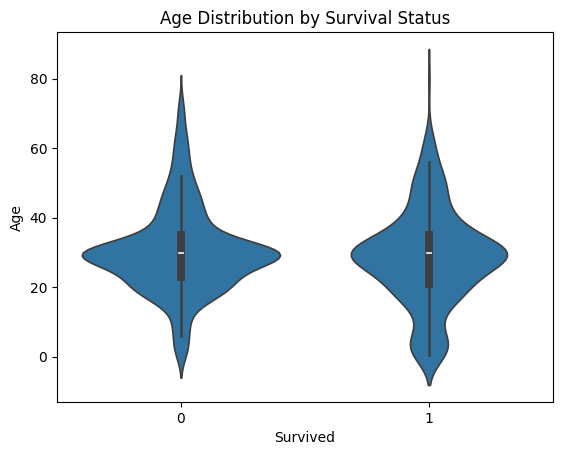

In [81]:
#Violinplot: Age by Survived (Age distribution among survivors).
plt.figure()
sns.violinplot(x='Survived', y='Age', data=df)
plt.title('Age Distribution by Survival Status')
plt.show()

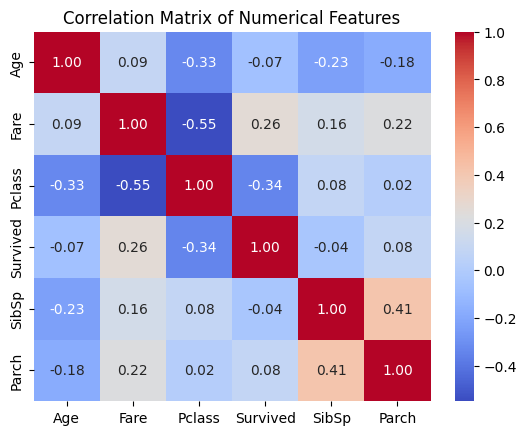

In [82]:
# Heatmap: Correlation between numerical columns (Age, Fare, Pclass, Survived).
plt.figure()
numeric_cols = df[['Age', 'Fare', 'Pclass', 'Survived', 'SibSp', 'Parch']]
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Part D â€“ Probability Concepts


## Now letâ€™s connect Titanic survival with Probability Theory.
### 1. Empirical Probability (From Data)
    - Empirical probability = Favorable Outcomes Ã· Total Outcomes
    - Examples:
    - Probability a passenger survived:
     - P(Survived) = Survivors / Total Passengers
    - Probability a female survived:
     - P(\text{Female Survived}) = Surviving Females / Total Females
    - Probability a male survived:
     - P(\text{Male Survived}) = Surviving Males / Total Males
    - Compare probabilities across Pclass.
    - ðŸ‘‰ These values come directly from the dataset


In [83]:
p_survived = df['Survived'].mean()
print(f"\nEmpirical P(Survived): {p_survived:.4f}")

p_female_survived = df[df['Sex'] == 'female']['Survived'].mean()
print(f"Empirical P(Female Survived): {p_female_survived:.4f}")

p_male_survived = df[df['Sex'] == 'male']['Survived'].mean()
print(f"Empirical P(Male Survived): {p_male_survived:.4f}")

print("\nEmpirical P(Survived) by Class:")
print(df.groupby('Pclass')['Survived'].mean())


Empirical P(Survived): 0.3838
Empirical P(Female Survived): 0.7420
Empirical P(Male Survived): 0.1889

Empirical P(Survived) by Class:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


## 2. Theoretical Probability (Assumptions)
    - Imagine survival was random or equally likely for everyone.
    - Then, P(Survived)=0.5 (like flipping a coin).
    - Each class (Pclass) should have the same chance of survival â†’ 1 / 3
    - Gender should not matter.
    - ðŸ‘‰ These values are assumptions, not based on data.


In [84]:
print("\nComparison with Theoretical Probability:")
print("The assignment assumes a theoretical P(Survived) of 0.5" )
print(f"The empirical P(Survived) is {p_survived:.4f}, which shows survival was not a random 50/50 chance.")


Comparison with Theoretical Probability:
The assignment assumes a theoretical P(Survived) of 0.5
The empirical P(Survived) is 0.3838, which shows survival was not a random 50/50 chance.


# Part E â€“ Insights & Reporting


## 9-Answer the following in your notebook/report:
      - Did women survive at a higher rate than men?
      - Which class had the best survival chance?
      - Did age play a role in survival?
      - Was Fare (ticket price) related to survival?
      - How do empirical probabilities differ from theoretical probabilities?
## 10-Summarize your analysis in 5â€“7 bullet points.
## 11-Save your work as Titanic_Analysis.ipynb with:
    - Cleaned data
    - All visualizations
    - Probability calculations
    - Final insights


## Did women survive more than men?
- Yes, absolutely. Women were far more likely to survive. About 74% of women made it, while only 19% of men did. This was the biggest factor in who survived.

## Which class had the best chance of survival?
- First-class passengers had the best chance. About 63% of them survived. The richest people had the easiest access to the lifeboats on the top decks of the ship. Third-class had the worst chance.

## Did age matter for survival?
- Yes, it did. Children were more likely to survive than adults. This shows that the "women and children first" rule was followed during the rescue.

## Was the ticket price (Fare) related to survival?
- Yes. A higher ticket price meant you were in a better class and had a much better chance of surviving. Fare and Class are very closely related.

## What's the difference between "Empirical" and "Theoretical" probability?
- It's the difference between what really happened versus a simple guess.

- Theoretical Probability: This is a guess based on perfect conditions. For example, a coin has a 50/50 chance of landing on heads. If survival was random, you might guess everyone had a 50% chance.

- Empirical Probability: This is what the actual data tells you. We looked at the real numbers and found that only 38% of people survived. This real result proves that survival wasn't a random 50/50 chance.

## Summary of Your Analysis (Key Points)
- Here are the most important findings from the Titanic data:

- Gender was the biggest factor: Being a woman gave you the best chance to survive.

- Money made a huge difference: Rich, first-class passengers were much safer than poor, third-class passengers.

- "Women and children first" was real: The data shows that both women and children were given priority for the lifeboats.

- Survival was not random luck: The real numbers (empirical probability) prove that a person's social status, gender, and age were the keys to survival.

- Where you were on the ship mattered: First-class cabins were on the top decks, close to the lifeboats. Third-class was deep inside the ship, making it hard to get out.

- The saddest truth: Your best chance was to be a rich woman, and your worst chance was to be a poor man.